In [485]:
X_train = read.csv('hw11t3v0_train.txt',sep = '',header = FALSE)
y_train = read.csv('hw11t3v0_target.txt',sep = '',header = FALSE)
X_test = read.csv('hw11t3v0_test.txt',sep = '',header = FALSE)
y_test = read.csv('hw11t3v0_target_test.txt',sep = '',header = FALSE)

In [481]:
summary(X_train)

       V1                  V2                V3               V4         
 Min.   :-104.9710   Min.   :-47.026   Min.   :-40.78   Min.   :-7.5600  
 1st Qu.: -65.2835   1st Qu.:-29.799   1st Qu.:-25.47   1st Qu.:-1.5750  
 Median :   0.5845   Median : -2.215   Median : 18.57   Median : 0.2265  
 Mean   : -10.7035   Mean   : -2.636   Mean   :  4.60   Mean   : 0.2470  
 3rd Qu.:  32.8817   3rd Qu.: 22.396   3rd Qu.: 23.29   3rd Qu.: 1.9808  
 Max.   :  68.1040   Max.   : 39.451   Max.   : 37.32   Max.   : 7.7840  
       V5               V6                V7         
 Min.   :-9.290   Min.   :-5.0380   Min.   :-4.5330  
 1st Qu.:-2.196   1st Qu.:-0.7680   1st Qu.:-1.0897  
 Median : 0.398   Median : 0.3715   Median : 0.1230  
 Mean   : 0.192   Mean   : 0.4005   Mean   : 0.1349  
 3rd Qu.: 2.434   3rd Qu.: 1.6253   3rd Qu.: 1.3275  
 Max.   : 9.977   Max.   : 6.0200   Max.   : 5.2510  

Сначала применим простую линейную регрессию:

In [500]:
y_train <- as.matrix(y_train)
y_test <- as.matrix(y_test)

In [501]:
model <- lm(y_train ~ V1 + V2 + V3 + V4 + V5 + V6 + V7, data = X_train)

In [502]:
summary(model)


Call:
lm(formula = y_train ~ V1 + V2 + V3 + V4 + V5 + V6 + V7, data = X_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-194.691  -34.024   -1.454   33.633  204.707 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -96.1205     4.1768 -23.013   <2e-16 ***
V1           -554.7978  1839.6831  -0.302    0.763    
V2          -1486.8307  4870.4150  -0.305    0.760    
V3          -2150.5497  7071.3433  -0.304    0.761    
V4              3.1264     3.9444   0.793    0.428    
V5              0.9941     1.2167   0.817    0.414    
V6              1.4347     6.5134   0.220    0.826    
V7             -2.8495     3.6963  -0.771    0.441    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 56.45 on 492 degrees of freedom
Multiple R-squared:  0.9414,	Adjusted R-squared:  0.9405 
F-statistic:  1129 on 7 and 492 DF,  p-value: < 2.2e-16


Мы видим, что:
ни один коэффициент кроме константы не значим,
регрессия в целом значима

Это один из признаков мультиколлинеарности.

Попробуем предсказать:

In [503]:
y_pred = predict(model, X_test)

In [504]:
# install.packages("TSPred")
library("TSPred")

In [505]:
sMAPE(y_test, y_pred)

[1] 0.422721

Попробуем эффективно понизить размерность, чтобы побороться с этим

Посмотрим как будет меняться дисперсия при оптимальном понижении на различные размерности

In [509]:
res.pca <- prcomp(X_train,scale = TRUE)

In [510]:
names(res.pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [511]:
head(res.pca$sdev)

[1] 1.5399760 1.4438348 1.1449564 0.8319646 0.7207699 0.1456551

In [512]:
# Eigenvalues
eig <- (res.pca$sdev)^2
cumeig <- cumsum(eig)
sum <- cumeig[length(cumeig)]
E <- (sum - cumeig)/sum 

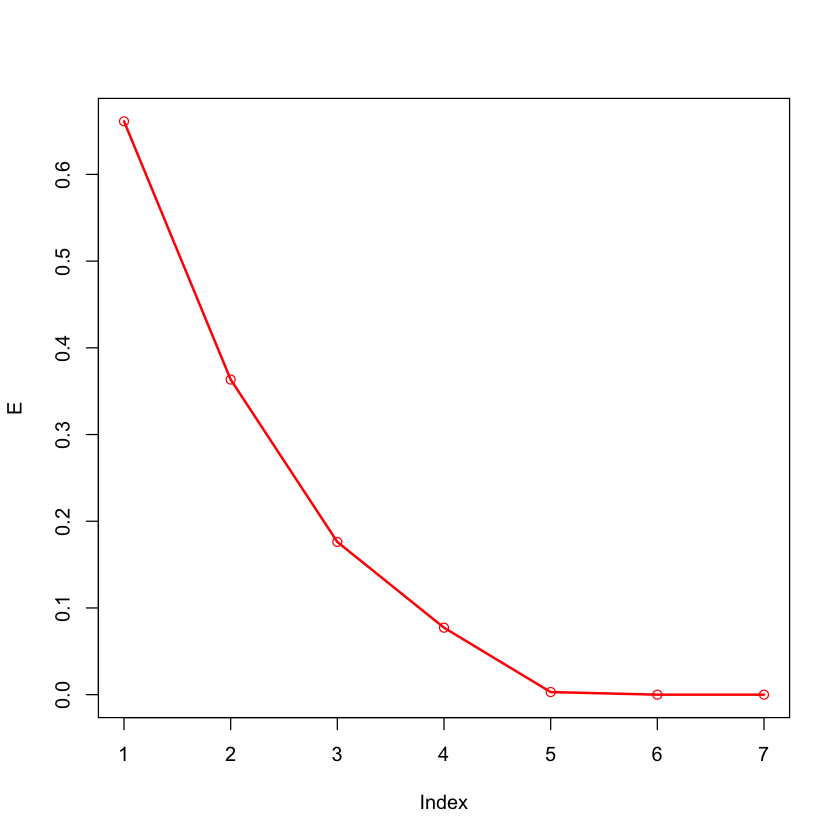

In [513]:
plot(E,col = 'red')
lines(E, col = "red", lwd = 2)

понизим размерность до 5 (т. к. далее $E_m \sim 0$)

In [514]:
pca5 = data.frame(res.pca$x[,1:5])

In [515]:
head(pca5)

PC1,PC2,PC3,PC4,PC5
-2.4212926,-0.3055467,-0.4232546,0.5183919,0.2507286
-3.4485601,0.5650684,0.5339999,0.1452224,0.1558152
1.4205105,-0.1183589,-1.6840259,-0.8819134,0.4400778
0.4032232,1.4360940,1.3055765,1.1446710,1.2086077
1.8065566,-0.2405386,-0.5843480,-1.4057286,-0.1805031
1.6694428,0.4529918,-0.8026868,0.9331152,0.2915890


In [516]:
model <- lm(y_train ~ PC1 + PC2 + PC3 + PC4 + PC5, data = pca5)

In [517]:
summary(model)


Call:
lm(formula = y_train ~ PC1 + PC2 + PC3 + PC4 + PC5, data = pca5)

Residuals:
     Min       1Q   Median       3Q      Max 
-195.493  -34.359   -1.829   33.896  203.814 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -130.291      2.521 -51.692   <2e-16 ***
PC1          -30.961      1.638 -18.897   <2e-16 ***
PC2          -19.523      1.747 -11.172   <2e-16 ***
PC3            4.018      2.204   1.823   0.0689 .  
PC4          258.024      3.033  85.082   <2e-16 ***
PC5          -49.478      3.500 -14.135   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 56.36 on 494 degrees of freedom
Multiple R-squared:  0.9413,	Adjusted R-squared:  0.9407 
F-statistic:  1585 on 5 and 494 DF,  p-value: < 2.2e-16


теперь почти все переменные значимы,

посмотрим на ошибку:

In [518]:
M = c(colMeans(X_train))
S = c(apply(X_train,2,sd))
scale_fit <- function(X) {
    Tx = sweep(X,2,M,'-')
    return (sweep(Tx, 2, S, '/'))
}

In [519]:
X_test_normed = scale_fit(X_test)

In [520]:
y_pred = predict(model, data.frame(prcomp(X_test_normed, scale = FALSE)$x[,1:5]))

In [521]:
sMAPE(y_test, y_pred)

[1] 0.5959824

ошибка внезапно выросла

посмотрим на некоторые одномерные проекции

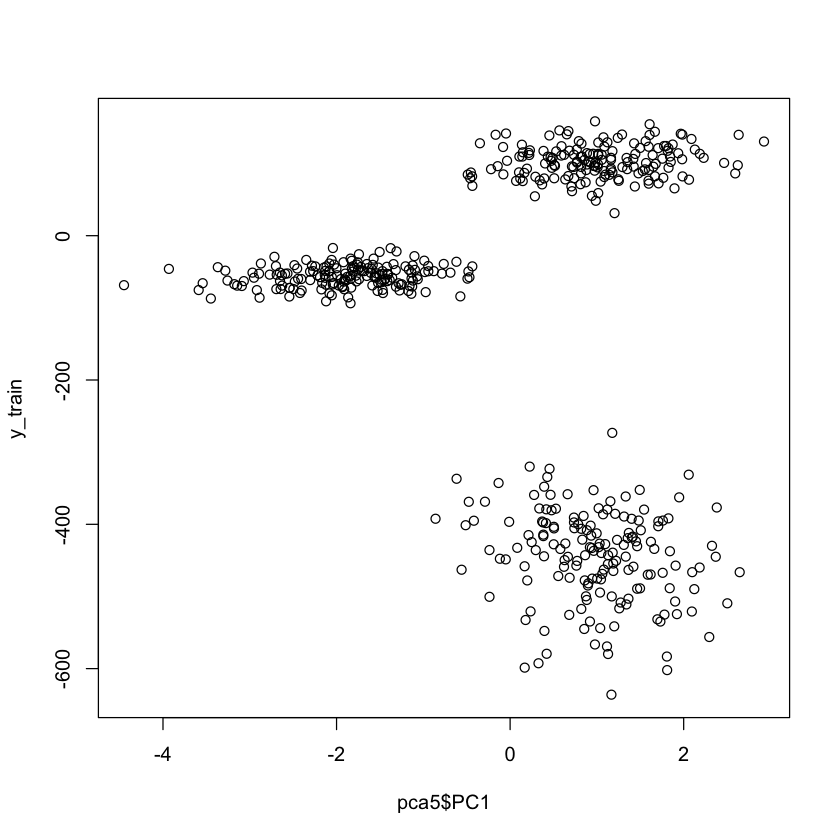

In [522]:
plot(pca5$PC1, y_train)

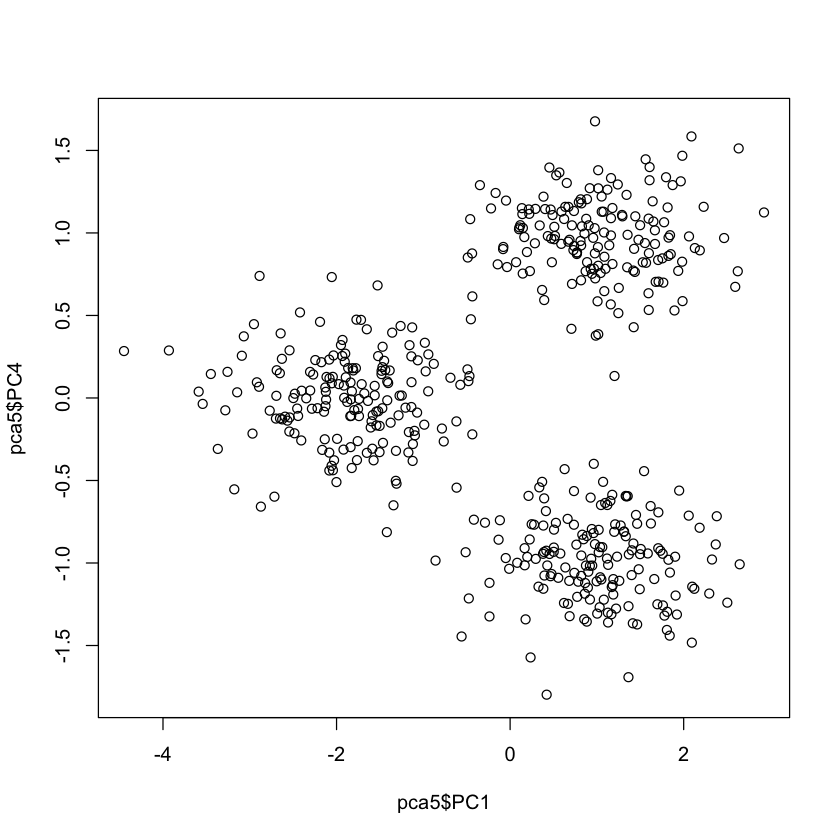

In [523]:
plot(pca5$PC1, pca5$PC4)

можно разбить на 3 кластера и в каждом применить линейную модель

In [524]:
get_cluster<-function(X){
    if(X[1] < -0.15)
        return (1)
    if(X[4] > 0)
        return (2)
    return (3)
}

In [525]:
head(pca5)

PC1,PC2,PC3,PC4,PC5
-2.4212926,-0.3055467,-0.4232546,0.5183919,0.2507286
-3.4485601,0.5650684,0.5339999,0.1452224,0.1558152
1.4205105,-0.1183589,-1.6840259,-0.8819134,0.4400778
0.4032232,1.4360940,1.3055765,1.1446710,1.2086077
1.8065566,-0.2405386,-0.5843480,-1.4057286,-0.1805031
1.6694428,0.4529918,-0.8026868,0.9331152,0.2915890


In [526]:
print(as.numeric(pca5[1,]))

[1] -2.4212926 -0.3055467 -0.4232546  0.5183919  0.2507286


In [527]:
counters = rep(0,3)
numbers = rep(0, nrow(pca5))
for(i in 1:nrow(pca5)) {
    x = as.numeric(pca5[i,])
    ind = get_cluster(x)
    counters[ind] <- counters[ind] + 1
    numbers[i] <- ind
}

In [528]:
isN<- function(N) {
    g <-function(x) {
        return (x == N)
    }
    return (g)
}


getModel <-function(i) {
    cluster = rep(0,counters[i])
    last <- 1
    for(j in 1:nrow(pca5)) {
        if (numbers[j] == i) {
            cluster[last] <- j
            last <- last + 1
        }
    }
    frame = pca5[cluster,]
    train = y_train[cluster]
#     print(frame)
#     print(train)
    model <- lm(train ~ PC1 + PC2 + PC3 + PC4 + PC5, data=frame)
#     print(summary(model))
    return (model)
}

In [529]:
m1 =getModel(1)
m2 = getModel(2)
m3 = getModel(3)

cur_model <- function(i) {
    if(i == 1)
        return (m1)
    if(i == 2)
        return (m2)
    return (m3)
}

In [530]:
prediction <- function(test) {
    normed <- scale_fit(test)
    pca_test <- data.frame(prcomp(normed, scale = FALSE)$x[,1:5])
    y_pred <- rep(0,nrow(test))
    for(i in 1:nrow(test)) {
        x <- pca_test[i,]
        ind <- get_cluster(x)
#         print(x)
        y_pred[i] <- predict(cur_model(ind), x)
    }
#     plot(pca_test$PC1, y_pred)
#     plot(pca5$PC1, y_train)
    return (y_pred)
}

In [531]:
sMAPE(y_test, prediction(X_test))

[1] 0.8240055

стало только хуже(